## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9697378	total: 48.3ms	remaining: 48.2s
1:	learn: 0.9514017	total: 49.4ms	remaining: 24.6s
2:	learn: 0.9306007	total: 50.6ms	remaining: 16.8s
3:	learn: 0.9138579	total: 51.8ms	remaining: 12.9s
4:	learn: 0.8954099	total: 53ms	remaining: 10.5s
5:	learn: 0.8787215	total: 54.1ms	remaining: 8.96s
6:	learn: 0.8631804	total: 55.2ms	remaining: 7.83s
7:	learn: 0.8464852	total: 56.3ms	remaining: 6.98s
8:	learn: 0.8315079	total: 57.2ms	remaining: 6.3s
9:	learn: 0.8143983	total: 58.3ms	remaining: 5.77s
10:	learn: 0.7992950	total: 59.4ms	remaining: 5.34s
11:	learn: 0.7852962	total: 60.5ms	remaining: 4.98s
12:	learn: 0.7702603	total: 61.5ms	remaining: 4.67s
13:	learn: 0.7552899	total: 62.6ms	remaining: 4.41s
14:	learn: 0.7425021	total: 63.7ms	remaining: 4.18s
15:	learn: 0.7293267	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7153021	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7023430	total: 66.7ms	remaining: 3.64s
18:	learn: 0.6901362	total: 67.8ms	remaining: 3.5

91:	learn: 0.3197059	total: 142ms	remaining: 1.41s
92:	learn: 0.3178063	total: 144ms	remaining: 1.4s
93:	learn: 0.3154811	total: 145ms	remaining: 1.39s
94:	learn: 0.3138111	total: 146ms	remaining: 1.39s
95:	learn: 0.3132072	total: 147ms	remaining: 1.38s
96:	learn: 0.3114738	total: 148ms	remaining: 1.37s
97:	learn: 0.3104684	total: 148ms	remaining: 1.37s
98:	learn: 0.3088722	total: 149ms	remaining: 1.36s
99:	learn: 0.3077537	total: 150ms	remaining: 1.35s
100:	learn: 0.3060228	total: 151ms	remaining: 1.35s
101:	learn: 0.3043544	total: 152ms	remaining: 1.34s
102:	learn: 0.3029381	total: 153ms	remaining: 1.34s
103:	learn: 0.3014757	total: 154ms	remaining: 1.33s
104:	learn: 0.3004778	total: 155ms	remaining: 1.32s
105:	learn: 0.2989123	total: 156ms	remaining: 1.32s
106:	learn: 0.2973724	total: 157ms	remaining: 1.31s
107:	learn: 0.2957482	total: 158ms	remaining: 1.31s
108:	learn: 0.2943327	total: 159ms	remaining: 1.3s
109:	learn: 0.2926492	total: 160ms	remaining: 1.3s
110:	learn: 0.2911902	to

219:	learn: 0.2117024	total: 280ms	remaining: 991ms
220:	learn: 0.2111519	total: 281ms	remaining: 990ms
221:	learn: 0.2108337	total: 282ms	remaining: 988ms
222:	learn: 0.2105092	total: 283ms	remaining: 986ms
223:	learn: 0.2098764	total: 284ms	remaining: 984ms
224:	learn: 0.2094416	total: 285ms	remaining: 982ms
225:	learn: 0.2090191	total: 286ms	remaining: 980ms
226:	learn: 0.2086604	total: 287ms	remaining: 978ms
227:	learn: 0.2083423	total: 288ms	remaining: 976ms
228:	learn: 0.2077778	total: 289ms	remaining: 974ms
229:	learn: 0.2074363	total: 290ms	remaining: 971ms
230:	learn: 0.2071872	total: 291ms	remaining: 969ms
231:	learn: 0.2065042	total: 292ms	remaining: 967ms
232:	learn: 0.2060583	total: 293ms	remaining: 965ms
233:	learn: 0.2056186	total: 294ms	remaining: 963ms
234:	learn: 0.2053273	total: 295ms	remaining: 960ms
235:	learn: 0.2047717	total: 296ms	remaining: 959ms
236:	learn: 0.2045799	total: 297ms	remaining: 957ms
237:	learn: 0.2040054	total: 298ms	remaining: 955ms
238:	learn: 

352:	learn: 0.1642041	total: 415ms	remaining: 761ms
353:	learn: 0.1638164	total: 416ms	remaining: 760ms
354:	learn: 0.1632681	total: 418ms	remaining: 759ms
355:	learn: 0.1628835	total: 419ms	remaining: 757ms
356:	learn: 0.1624348	total: 420ms	remaining: 756ms
357:	learn: 0.1621089	total: 421ms	remaining: 754ms
358:	learn: 0.1618275	total: 422ms	remaining: 753ms
359:	learn: 0.1614968	total: 423ms	remaining: 751ms
360:	learn: 0.1612285	total: 424ms	remaining: 750ms
361:	learn: 0.1608087	total: 425ms	remaining: 748ms
362:	learn: 0.1605049	total: 426ms	remaining: 747ms
363:	learn: 0.1601491	total: 427ms	remaining: 745ms
364:	learn: 0.1597941	total: 428ms	remaining: 744ms
365:	learn: 0.1595472	total: 429ms	remaining: 743ms
366:	learn: 0.1590506	total: 430ms	remaining: 741ms
367:	learn: 0.1586107	total: 431ms	remaining: 740ms
368:	learn: 0.1581950	total: 432ms	remaining: 738ms
369:	learn: 0.1578291	total: 433ms	remaining: 737ms
370:	learn: 0.1575070	total: 434ms	remaining: 735ms
371:	learn: 

485:	learn: 0.1247568	total: 548ms	remaining: 580ms
486:	learn: 0.1244520	total: 550ms	remaining: 579ms
487:	learn: 0.1241531	total: 551ms	remaining: 578ms
488:	learn: 0.1238951	total: 552ms	remaining: 577ms
489:	learn: 0.1237393	total: 553ms	remaining: 576ms
490:	learn: 0.1236453	total: 554ms	remaining: 574ms
491:	learn: 0.1235943	total: 555ms	remaining: 573ms
492:	learn: 0.1233256	total: 556ms	remaining: 572ms
493:	learn: 0.1232772	total: 557ms	remaining: 571ms
494:	learn: 0.1229587	total: 558ms	remaining: 569ms
495:	learn: 0.1226922	total: 559ms	remaining: 568ms
496:	learn: 0.1226268	total: 560ms	remaining: 567ms
497:	learn: 0.1224636	total: 561ms	remaining: 566ms
498:	learn: 0.1222692	total: 562ms	remaining: 564ms
499:	learn: 0.1219885	total: 563ms	remaining: 563ms
500:	learn: 0.1215627	total: 564ms	remaining: 562ms
501:	learn: 0.1214567	total: 565ms	remaining: 560ms
502:	learn: 0.1212683	total: 566ms	remaining: 559ms
503:	learn: 0.1210061	total: 567ms	remaining: 558ms
504:	learn: 

616:	learn: 0.1007578	total: 684ms	remaining: 424ms
617:	learn: 0.1006239	total: 685ms	remaining: 423ms
618:	learn: 0.1005696	total: 686ms	remaining: 422ms
619:	learn: 0.1004764	total: 687ms	remaining: 421ms
620:	learn: 0.1002249	total: 688ms	remaining: 420ms
621:	learn: 0.1000852	total: 689ms	remaining: 419ms
622:	learn: 0.0998988	total: 690ms	remaining: 418ms
623:	learn: 0.0997459	total: 691ms	remaining: 416ms
624:	learn: 0.0995324	total: 692ms	remaining: 415ms
625:	learn: 0.0994040	total: 693ms	remaining: 414ms
626:	learn: 0.0992933	total: 694ms	remaining: 413ms
627:	learn: 0.0990812	total: 695ms	remaining: 412ms
628:	learn: 0.0988926	total: 696ms	remaining: 411ms
629:	learn: 0.0985557	total: 697ms	remaining: 409ms
630:	learn: 0.0983586	total: 698ms	remaining: 408ms
631:	learn: 0.0982443	total: 699ms	remaining: 407ms
632:	learn: 0.0981509	total: 700ms	remaining: 406ms
633:	learn: 0.0979342	total: 701ms	remaining: 405ms
634:	learn: 0.0978003	total: 702ms	remaining: 404ms
635:	learn: 

751:	learn: 0.0814439	total: 819ms	remaining: 270ms
752:	learn: 0.0812322	total: 820ms	remaining: 269ms
753:	learn: 0.0811963	total: 821ms	remaining: 268ms
754:	learn: 0.0810058	total: 822ms	remaining: 267ms
755:	learn: 0.0809206	total: 823ms	remaining: 266ms
756:	learn: 0.0807790	total: 824ms	remaining: 265ms
757:	learn: 0.0806521	total: 825ms	remaining: 263ms
758:	learn: 0.0804529	total: 826ms	remaining: 262ms
759:	learn: 0.0803184	total: 827ms	remaining: 261ms
760:	learn: 0.0801990	total: 828ms	remaining: 260ms
761:	learn: 0.0801469	total: 829ms	remaining: 259ms
762:	learn: 0.0799842	total: 830ms	remaining: 258ms
763:	learn: 0.0797467	total: 831ms	remaining: 257ms
764:	learn: 0.0795369	total: 832ms	remaining: 256ms
765:	learn: 0.0793258	total: 833ms	remaining: 254ms
766:	learn: 0.0791988	total: 834ms	remaining: 253ms
767:	learn: 0.0791767	total: 835ms	remaining: 252ms
768:	learn: 0.0790719	total: 836ms	remaining: 251ms
769:	learn: 0.0789136	total: 837ms	remaining: 250ms
770:	learn: 

889:	learn: 0.0666628	total: 957ms	remaining: 118ms
890:	learn: 0.0665842	total: 958ms	remaining: 117ms
891:	learn: 0.0664878	total: 959ms	remaining: 116ms
892:	learn: 0.0663558	total: 960ms	remaining: 115ms
893:	learn: 0.0663013	total: 962ms	remaining: 114ms
894:	learn: 0.0661359	total: 963ms	remaining: 113ms
895:	learn: 0.0660256	total: 964ms	remaining: 112ms
896:	learn: 0.0659311	total: 965ms	remaining: 111ms
897:	learn: 0.0657956	total: 966ms	remaining: 110ms
898:	learn: 0.0657144	total: 967ms	remaining: 109ms
899:	learn: 0.0656326	total: 968ms	remaining: 108ms
900:	learn: 0.0655271	total: 969ms	remaining: 107ms
901:	learn: 0.0654405	total: 971ms	remaining: 105ms
902:	learn: 0.0653666	total: 972ms	remaining: 104ms
903:	learn: 0.0652456	total: 973ms	remaining: 103ms
904:	learn: 0.0651624	total: 974ms	remaining: 102ms
905:	learn: 0.0651219	total: 975ms	remaining: 101ms
906:	learn: 0.0649891	total: 976ms	remaining: 100ms
907:	learn: 0.0649519	total: 977ms	remaining: 99ms
908:	learn: 0

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

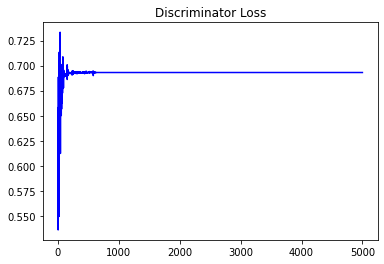

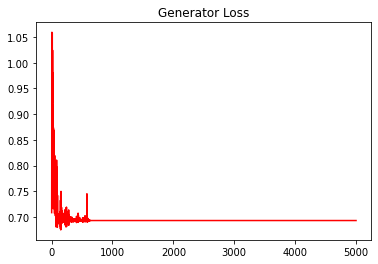

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

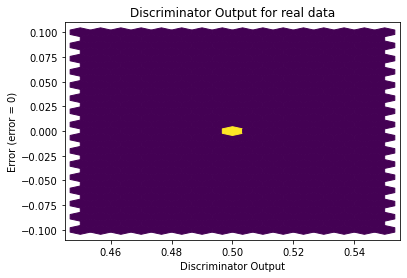

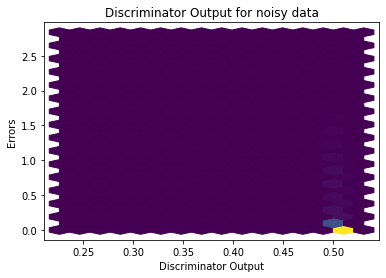

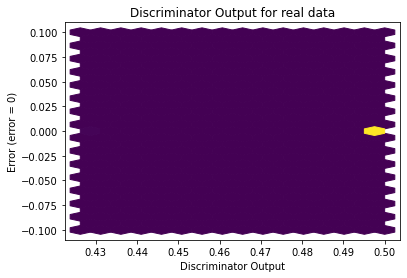

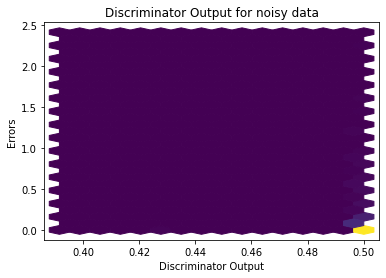

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


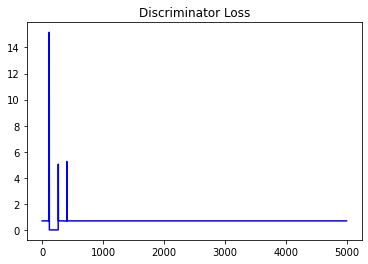

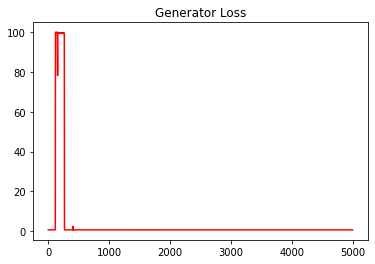

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

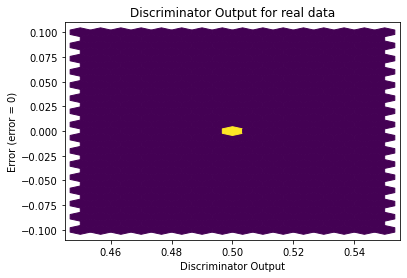

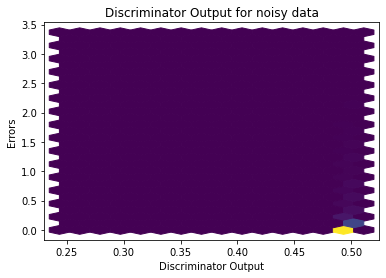

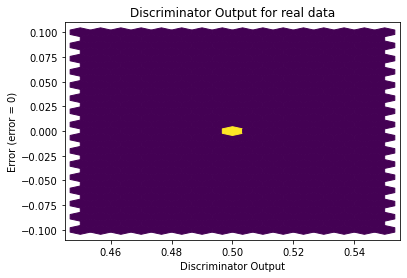

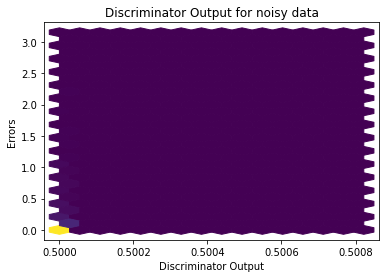

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
